In [7]:
import warnings
warnings.simplefilter(action="ignore")
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns
%matplotlib inline
!echo %cd%

C:\Users\cjohn\Documents\GWBootcamp\Group_Project\Project1_MonteCrypto


In [8]:
BTC_USD_path = Path("Resources/BTC-USD.csv")
ETH_USD_path = Path("Resources/ETH-USD.csv")
LTC_USD_path = Path("Resources/LTC-USD.csv")


In [9]:
def returns(csvpath):
    df=pd.read_csv(csvpath)
    df=df[["Date","Close"]]
    df.set_index(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)
    df.drop(columns=['Date'], inplace=True)
    df_1=df.sort_values(by=['Date'], ascending=True)
    df_new=df_1.dropna()
    return df_new

In [4]:
BTC_USD_df=returns(BTC_USD_path)
BTC_USD_df.columns=["BTC"]
BTC_USD_df=BTC_USD_df.pct_change().dropna()
BTC_USD_df.head()

,BTC
Date,
2015-01-02,0.002492
2015-01-03,-0.107767
2015-01-04,-0.060079
2015-01-05,0.038907
2015-01-06,0.042682


In [5]:
ETH_USD_df=returns(ETH_USD_path)
ETH_USD_df.columns=["ETH"]
ETH_USD_df.isnull().sum()
ETH_USD_df=ETH_USD_df.pct_change().dropna()
ETH_USD_df.head()

,ETH
Date,
2015-08-08,-0.728249
2015-08-09,-0.068268
2015-08-10,0.009333
2015-08-11,0.507323
2015-08-12,0.140075


In [6]:
LTC_USD_df=returns(LTC_USD_path)
LTC_USD_df.columns=["LTC"]
LTC_USD_df.isnull().sum()
LTC_USD_df=LTC_USD_df.pct_change().dropna()
LTC_USD_df.head()

,LTC
Date,
2015-01-02,-0.011741
2015-01-03,-0.200273
2015-01-04,-0.082732
2015-01-05,0.064139
2015-01-06,0.014379


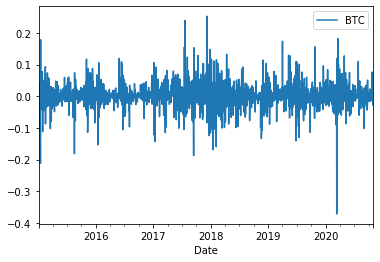

In [10]:
BTC_USD_df.plot()

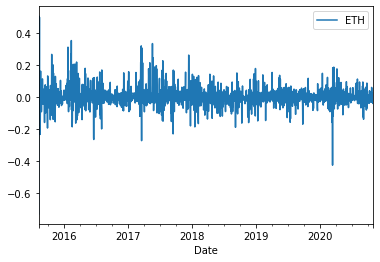

In [11]:
ETH_USD_df.plot()

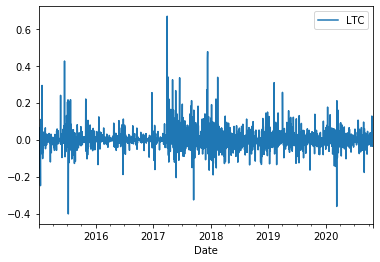

In [12]:
LTC_USD_df.plot()

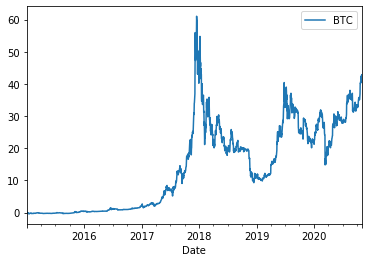

In [31]:
BTC_cumulative_return = (BTC_USD_df + 1).cumprod() - 1
BTC_cumulative_return.plot()

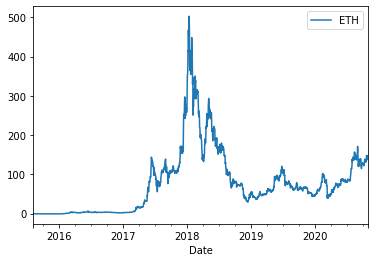

In [32]:
ETH_cumulative_return = (ETH_USD_df + 1).cumprod() - 1
ETH_cumulative_return.plot()

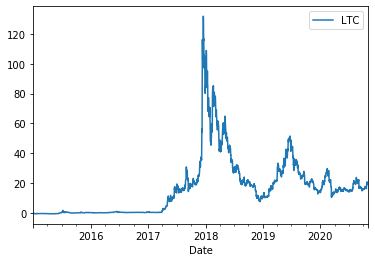

In [33]:
LTC_cumulative_return = (LTC_USD_df + 1).cumprod() - 1
LTC_cumulative_return.plot()

In [23]:
crypto_data = pd.concat([BTC_cumulative_return, ETH_cumulative_return, LTC_cumulative_return], axis="columns", join="inner")

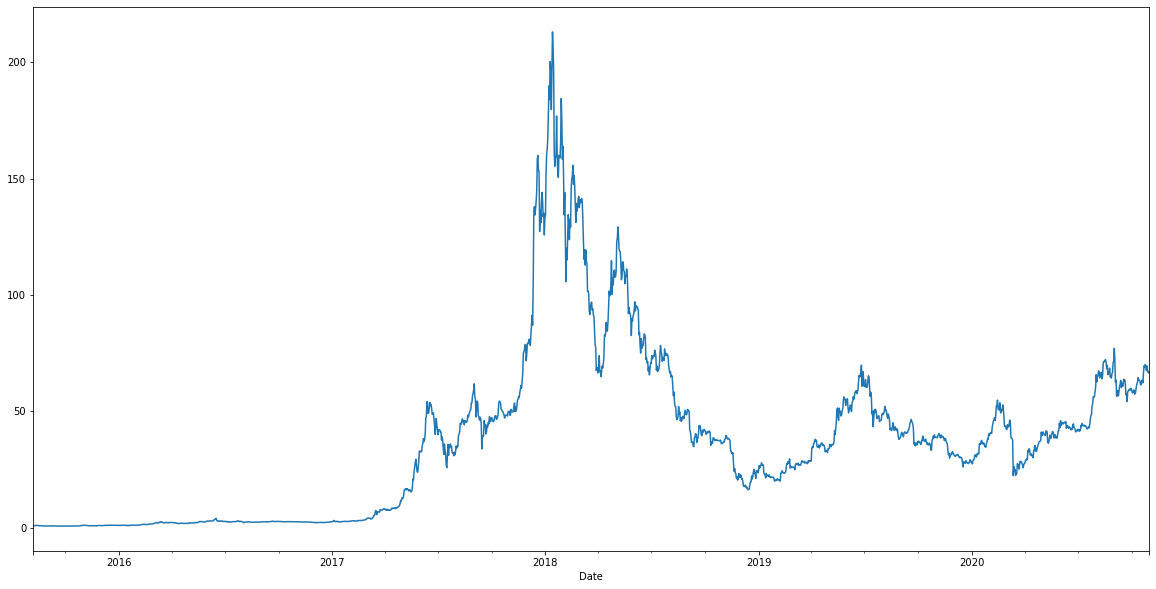

In [30]:
weights = [.33,.33,.33]
crypto_returns = crypto_data.dot(weights)
crypto_returns.plot(figsize =(20,10))